In [1]:
# -*- coding: utf-8 -*-
"""
PESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis
Created on Tue Sep 17 08:44:33 2024

@author: jmanitz
"""

'\nPESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis\nCreated on Tue Sep 17 08:44:33 2024\n\n@author: jmanitz\n'

In [7]:
### Load Data ############################################################################################

import numpy as np
import pandas as pd

In [9]:
# import data 
path = "/Users/navne/OneDrive/Desktop/Jule/Documents/climate_projects/ocean_capstone/acoustics_data_2020.csv"
dt = pd.read_csv(path, skipinitialspace=True, delimiter=";", low_memory=False)
dt.columns

Index(['Barco', 'Viaje', 'Region_ID', 'Region_name', 'Region_class',
       'Process_ID', 'Sv_mean', 'NASC', 'Sv_max', 'Sv_min',
       ...
       'Exclude_below_line_depth_max', 'Exclude_below_line_range_max',
       'Samples_Below_Bottom_Exclusion', 'Samples_Above_Surface_Exclusion',
       'Samples_In_Domain', 'Bad_data_empty_water_samples', 'Heave_source',
       'Heave_min', 'Heave_max', 'Heave_mean'],
      dtype='object', length=105)

In [28]:
# Check for relevant variables in the data set; possible response variable
dt[["Region_ID", "Region_class", "Species_name","Species_percent","Species_TS"]].astype('category').describe()

,Region_ID,Region_class,Species_name,Species_percent,Species_TS
count,27392,27392,27392,27392,27392
unique,5600,15,1,1,1
top,86,ANC,Unassigned,100,-40
freq,23,13763,27392,27392,27392


In [ ]:
### Descriptive Analysis ############################################################################################

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Frequency of Region_class'}, xlabel='Count', ylabel='Region_class'>

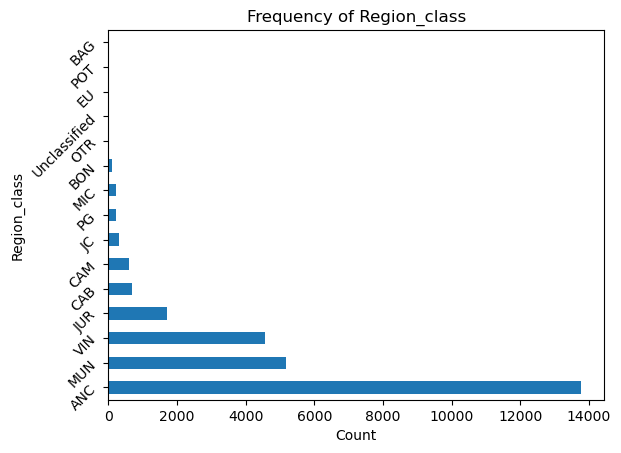

In [30]:
# Visualize Frequency of Region_class
dt["Region_class"].value_counts().plot(kind='barh',  rot=45, 
                                      ylabel='Region_class', xlabel='Count', title ="Frequency of Region_class")

In [32]:
# Frequency of Region_class
dt["Region_class"].value_counts()

Region_class
ANC             13763
MUN              5184
VIN              4567
JUR              1716
CAB               678
CAM               593
JC                322
PG                230
MIC               208
BON               103
OTR                10
Unclassified        8
EU                  6
POT                 2
BAG                 2
Name: count, dtype: int64

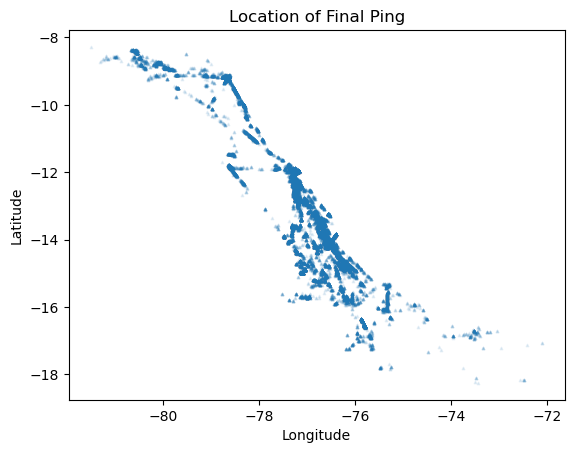

In [34]:
# Plot location at the final ping ('Lat_E', 'Lon_E')
plt.scatter(x=dt['Lon_E'], y=dt['Lat_E'], s=3, marker="^", alpha=0.1)
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')
plt.title ('Location of Final Ping')
plt.show()

In [36]:
# Most important predictors
dt[["Height_mean", "Depth_mean", "Sv_mean", "NASC", "Sv_max", "Sv_min", "Sv_noise", "ABC"]].describe()


,Height_mean,Depth_mean,Sv_mean,NASC,Sv_max,Sv_min,Sv_noise,ABC
count,27392.000000,27392.000000,27392.000000,2.739200e+04,27392.000000,27392.000000,27392.000000,2.739200e+04
mean,1.611526,34.877970,-160.970967,4.095618e+03,-151.590879,-167.704261,-980.418479,9.502279e-05
std,2.417622,55.066196,297.059548,1.042351e+05,300.393569,294.553784,10.650949,2.418366e-03
min,0.002306,0.725327,-999.000000,0.000000e+00,-999.000000,-999.000000,-1006.124041,0.000000e+00
25%,0.494609,7.498035,-65.007585,9.705766e+00,-55.219006,-64.988363,-986.730548,2.250000e-07
50%,0.787972,12.852724,-56.805446,7.819750e+01,-47.611876,-64.817348,-980.091839,1.815000e-06
75%,1.644000,27.789329,-50.498772,3.707061e+02,-40.971255,-63.641564,-973.618896,8.600000e-06
max,43.515127,315.094719,-7.530407,1.662787e+07,-0.253201,-42.212651,-941.014280,3.857846e-01


array([[<Axes: xlabel='Height_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Height_mean'>,
        <Axes: xlabel='NASC', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_max', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_min', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_noise', ylabel='Height_mean'>,
        <Axes: xlabel='ABC', ylabel='Height_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='NASC', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_max', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_min', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_noise', ylabel='Depth_mean'>,
        <Axes: xlabel='ABC', ylabel='Depth_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Sv_mean'>,
 

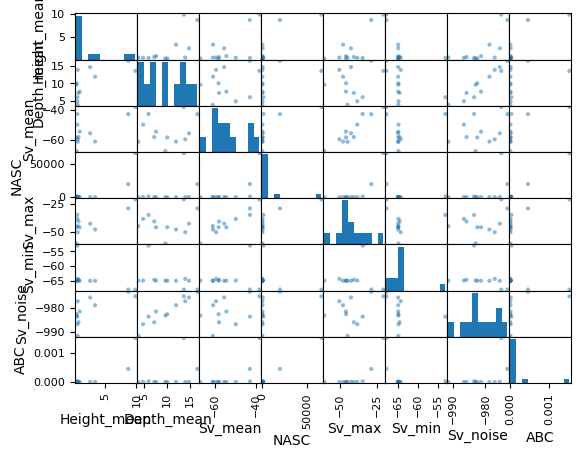

In [40]:
# Plot predictors of interest
dt3 = dt.loc[lambda dt: dt['Region_ID'] == 3] # Subset data for exploration purposes
pd.plotting.scatter_matrix(dt3[["Height_mean", "Depth_mean", "Sv_mean", "NASC", "Sv_max", "Sv_min", "Sv_noise","ABC"]])

Text(0.5, 1.0, 'Average Shoal Height and Depth')

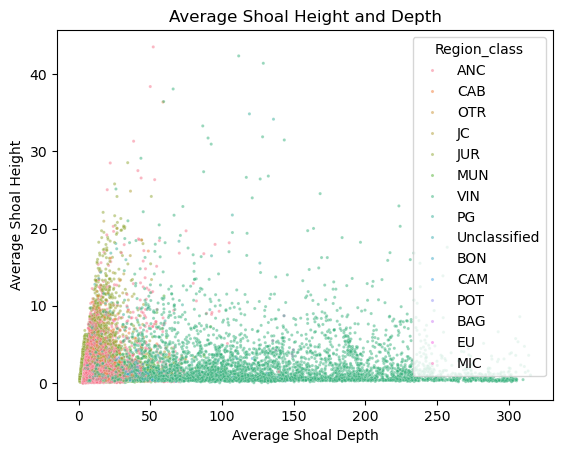

In [42]:
# Average Shoal Height and Depth 
sns.scatterplot(dt, y="Height_mean", x="Depth_mean", hue="Region_class", alpha=0.5, s=5)
plt.ylabel ('Average Shoal Height')
plt.xlabel ('Average Shoal Depth')
plt.title ('Average Shoal Height and Depth')

In [11]:
# Backscatter volume mean strength vs Nautical acoustic dispersion coefficient
#sns.scatterplot(dt, x="Sv_mean", y="NASC", alpha=0.5)# hue="Region_class",
#plt.ylabel ('Nautical acoustic dispersion coefficient')
#plt.xlabel ('Backscatter volume mean strength')

Text(0, 0.5, '')

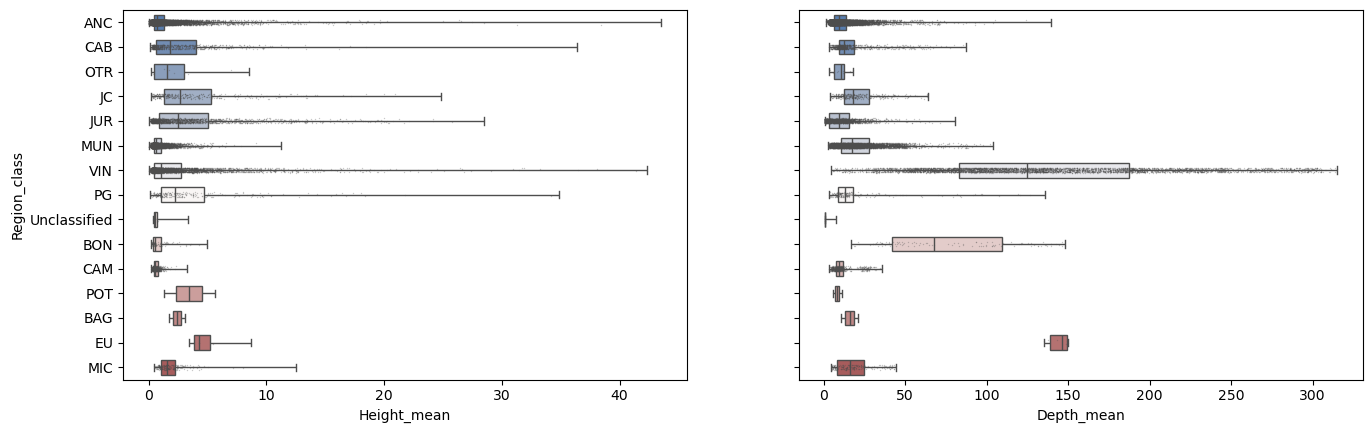

In [63]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(16)

sns.boxplot(data=dt, x="Height_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[0])
sns.stripplot(dt, x="Height_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[0])
sns.boxplot(data=dt, x="Depth_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[1])
sns.stripplot(dt, x="Depth_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel('')

Text(0, 0.5, '')

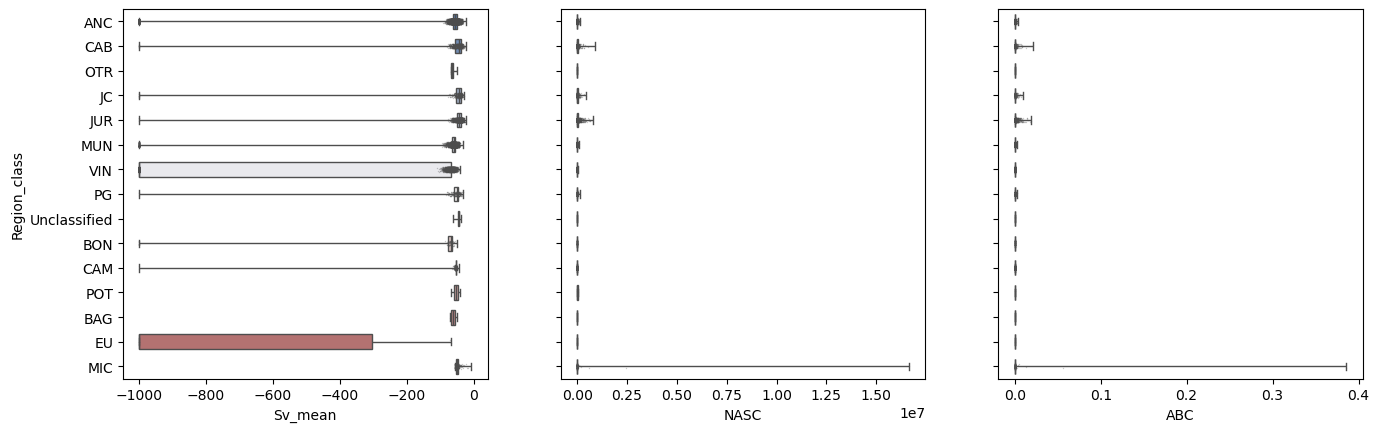

In [61]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(16)

sns.boxplot(data=dt, x="Sv_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[0])
sns.stripplot(dt, x="Sv_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[0])

sns.boxplot(data=dt, x="NASC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[1])
sns.stripplot(dt, x="NASC", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[1])
#plt.xscale("log", ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel('')

sns.boxplot(data=dt, x="ABC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[2])
sns.stripplot(dt, x="ABC", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[2])
#plt.xscale("log", ax=axs[1])
axs[2].set_yticklabels([])
axs[2].set_ylabel('')

Text(0.5, 0, '')

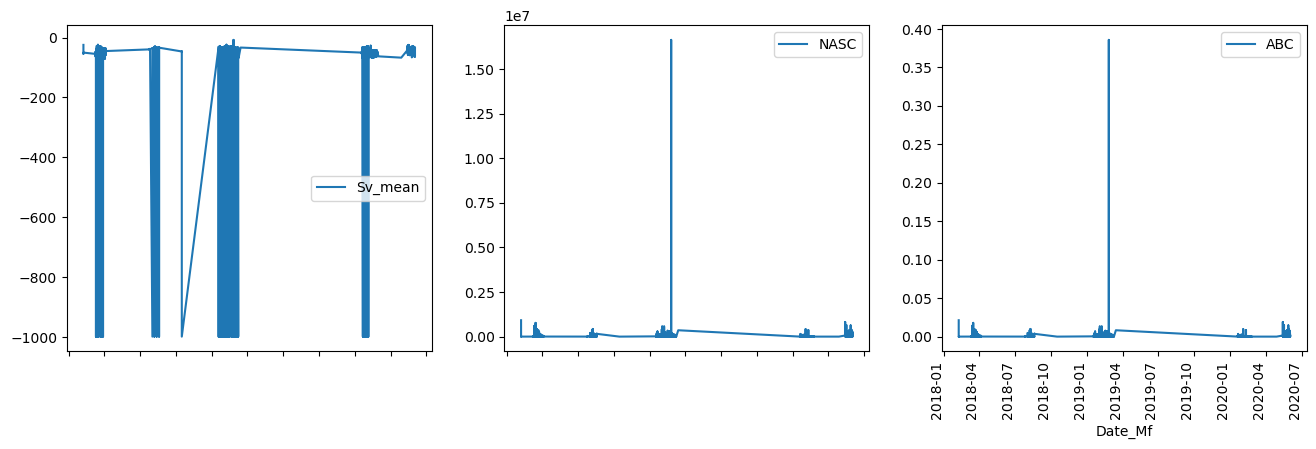

In [65]:
# Plot in terms of time of recording
dt['Date_Mf'] = pd.to_datetime(dt['Date_M'], format =  "%Y%m%d")
dtt = dt.sort_values('Date_Mf', ascending=True)

fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(16)

dtt.plot(x='Date_Mf', y='Sv_mean', rot='vertical', ax=axs[0]);
dtt.plot(x='Date_Mf', y='NASC', rot='vertical', ax=axs[1]);
dtt.plot(x='Date_Mf', y='ABC', rot='vertical', ax=axs[2]);

axs[0].set_xticklabels([])
axs[0].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].set_xlabel('')

In [11]:
### Linear Modelling ############################################################################################

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [179]:
# Define response variable and split dataset
x = dt.drop('Height_mean', axis=1)
y = dt['Height_mean']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Coefficients: [ 0.00030828 -0.19692514 -0.06254293  0.25497287  0.06729187 -0.13792229
 -0.05503246]
Model Intercept: 52.67561270588851


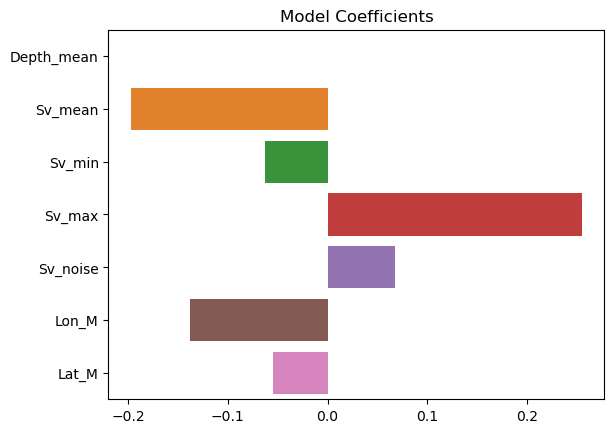

In [167]:
# Fit a linear model using only the numeric features in the dataframe.
numeric_features = ["Depth_mean", "Sv_mean","Sv_min", "Sv_max", "Sv_noise", "Lon_M", "Lat_M"]#, "Alpha","NASC",  "ABC", "Gain_constant", "Attack_angle"]
model1 = LinearRegression()
model1.fit(x_train[numeric_features], y_train)

# Output the coefficients
# Note that the intercept is not a part of .coef_ but is instead stored in .intercept_.
print(f"Model Coefficients: {model1.coef_}")
print(f"Model Intercept: {model1.intercept_}")

# Visualize crude measure of feature importance.
coefs = pd.DataFrame(model1.coef_, index=numeric_features, columns=['beta_value'])
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');

In [181]:
# Report train and test R2 scores.
train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)
print('Train R2:', train_score)
print('Test R2:', test_score)

Train R2: 0.325838028973901
Test R2: 0.3039065837526963


In [183]:
# Make predictions
y_pred = model1.predict(x_test[numeric_features])

# Compute the MSE for the test data
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.489307936143994


In [185]:
### Add categorical variable for species class
features = ["Region_class","Depth_mean", "Sv_mean","Sv_min", "Sv_max", "Sv_noise", "Lon_M", "Lat_M"]
# Create x train and test design matrices creating dummy variables for the categorical while keeping the numeric feature columns unchanged.
x_train2 = pd.get_dummies(x_train[features], drop_first=True)
x_test2 = pd.get_dummies(x_test[features], drop_first=True)
x_train2.head()

,Depth_mean,Sv_mean,Sv_min,Sv_max,Sv_noise,Lon_M,Lat_M,Region_class_BAG,Region_class_BON,Region_class_CAB,...,Region_class_EU,Region_class_JC,Region_class_JUR,Region_class_MIC,Region_class_MUN,Region_class_OTR,Region_class_PG,Region_class_POT,Region_class_Unclassified,Region_class_VIN
26295,4.200000,-59.946493,-64.983527,-49.498087,-988.964242,-78.438270,-9.746602,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23556,8.365459,-67.752224,-64.995588,-56.541255,-985.730082,-76.140503,-14.887889,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6977,214.847386,-999.000000,-999.000000,-999.000000,-999.000000,-76.076602,-15.752496,False,False,False,...,False,False,False,False,False,False,False,False,False,True
26546,5.586920,-58.530914,-64.904426,-50.816363,-984.663520,-78.300934,-10.057036,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19671,6.450047,-44.639786,-62.894877,-32.832627,-982.390125,-76.821601,-13.132980,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Model Coefficients: [-1.53033858e-03 -1.90000403e-01 -4.58099941e-02  2.31483496e-01
  7.25477333e-02 -1.45567770e-01 -5.42149392e-02 -1.34282153e+00
 -1.40982149e+00  3.34740601e-01 -8.43143311e-02  2.49949431e+00
  9.47409597e-01  9.65010121e-01 -6.32575948e-01 -4.03898839e-01
  1.37023277e+00  1.35690379e+00  1.84124203e+00 -6.33338418e-01
  2.31676900e-01]
Model Intercept: 57.63036504625165


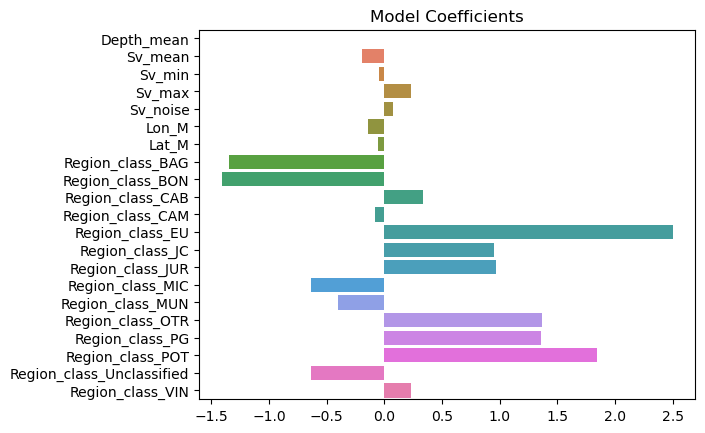

In [203]:
# Fit a linear model using numeric features and species class in the dataframe.
model2 = LinearRegression()
model2.fit(x_train2, y_train)

# Output the coefficients
# Note that the intercept is not a part of .coef_ but is instead stored in .intercept_.
print(f"Model Coefficients: {model2.coef_}")
print(f"Model Intercept: {model2.intercept_}")

# Visualize crude measure of feature importance.
coefs2 = pd.DataFrame(model2.coef_, index=x_train2.columns, columns=['beta_value'])
sns.barplot(data=coefs2.T, orient='h').set(title='Model Coefficients');

In [209]:
# Report train and test R2 scores.
train_score = model2.score(x_train2, y_train)
#test_score = model2.score(x_test2, y_test) <TODO>
print('Train R2:', train_score)
#print('Test R2:', test_score)

Train R2: 0.3444596157020261


In [215]:
# Make predictions <TODO>
#y_pred = model2.predict(x_test2) 

# Compute the MSE for the test data
#mse = mean_squared_error(y_pred, y_test)
#print(f"Mean Squared Error: {mse}")

In [ ]:
# NEXT: cv / regularization with NASC, ABC etc